In [1]:
import numpy as np
import seaborn as sns
sns.set_theme(style = 'darkgrid')
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import random

## 1 Feature

<Axes: >

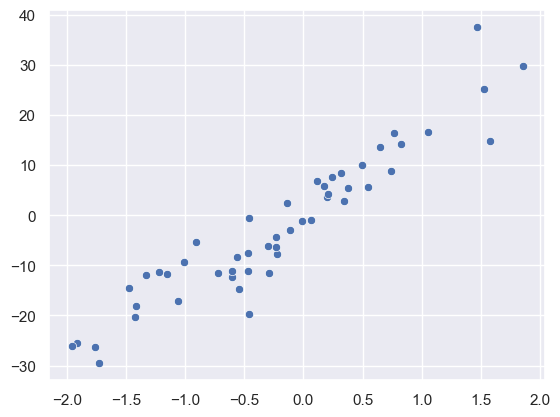

In [2]:
X, y = make_regression(n_samples=50, n_features=1, noise=5, random_state=42)
X =np.ravel(X)
sns.scatterplot(x = X,y = y)

# Random Line

In [3]:
# y = mx + c
# y = weights + biases
# wieghts = mx
# biases = c

# initialize with random m, c
random.seed(10)

m = random.random()
c = random.random()
print(m,c)

0.5714025946899135 0.4288890546751146


In [4]:
# First (random) attempt
preds = m * X + c

<Axes: >

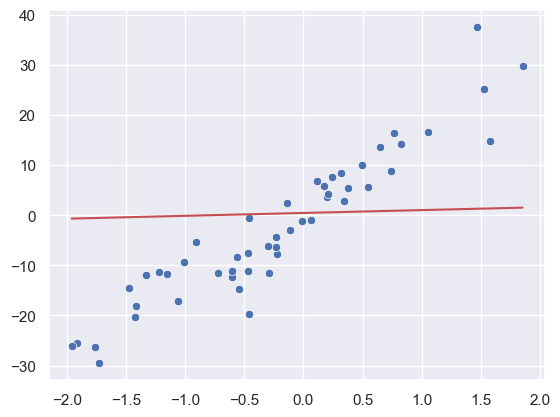

In [5]:
sns.scatterplot(x = X,y = y)
sns.lineplot(x = X,y = preds, c = 'r')

## Measuring Error

Using RMSE: 

$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$


In [6]:
def rmse(X, y, preds):
    n = len(X)
    return np.sqrt((sum((y - preds)**2)) / n)

In [7]:
rmse(X, y, preds)

14.263971682780822

## Updating Weights and biases
### Naive

I dont know how to implement gradient descent so just going to adjust the parameters manually for now

In [8]:
min_error = 1000
min_m = 0
min_c = 0
LR = 0.1
epochs = 10000
for _ in range(epochs):
    m = m - LR
    c = c + LR
    preds = m * X + c
    current_rmse = rmse(X, y, preds)
    if current_rmse < min_error:
        min_error = current_rmse
        min_m = m
        min_c = c
    else:
        break

<Axes: >

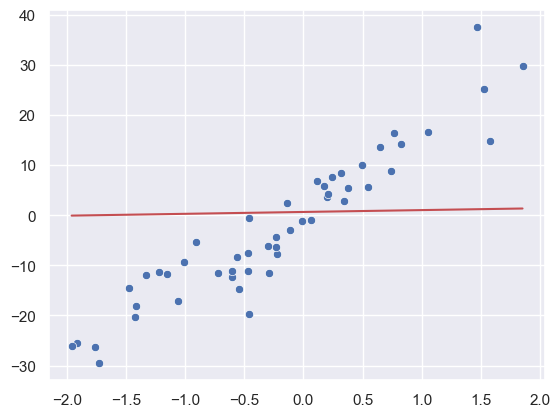

In [9]:
sns.scatterplot(x = X,y = y)
sns.lineplot(x = X,y = preds, c = 'r')

In [10]:
print(min_m, min_c, current_rmse)

0.4714025946899135 0.5288890546751146 14.4841383244328


## With gradfient descent

Cost function = -RMSE'

With negative RMSE and subtraction from weights/bias we can ensure the adjustment of m/c is correct:

1. 

In [23]:
rmse_list = []
m_list = []
c_list = []
min_error = 1000
min_m = 0
min_c = 0
LR = 0.01
epochs = 1000
current_rmse = rmse(X, y, preds)
for _ in range(epochs):
    m = m - LR*-current_rmse # Key is subtracting from negative RMSE 
    c = c - LR*(-current_rmse*X)
    preds = m * X + c
    current_rmse = rmse(X, y, preds)
    rmse_list.append(current_rmse)
    m_list.append(m)
    c_list.append(c)
    if current_rmse < min_error:
        min_error = current_rmse
        min_m = m
        min_c = c
    else:
        break

<Axes: >

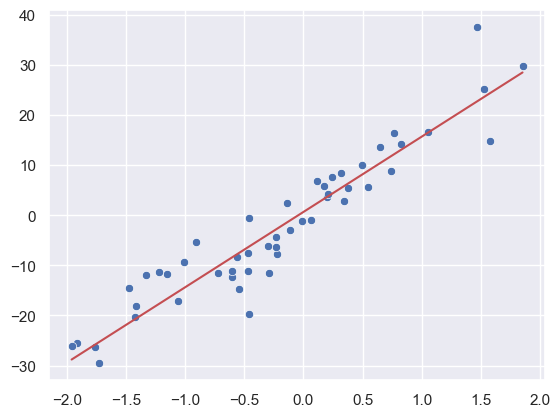

In [24]:
sns.scatterplot(x = X,y = y)
sns.lineplot(x = X,y = preds, c = 'r')

In [25]:
print(current_rmse)

4.845857048032078
